In [1]:
import pandas as pd
import numpy as np
from plotutil import *

def initialize_with_zeros(dim):
    W = np.zeros((dim,1))  
    w_0 = 0

    assert(W.shape == (dim, 1))
    assert(isinstance(w_0, float) or isinstance(w_0, int))
    return W, w_0

def gradient_descent(W, w_0, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []

    for i in range(num_iterations):
        m = X.shape[1]

        a= np.dot(W.T,X)+ w_0
        Y_hat= sigmoid(a)

        ca = Y * np.log(Y_hat)
        cb = (1-Y) * np.log(1-Y_hat)
        cost= -np.sum(ca+cb)/m
        dw = np.sum((Y_hat - Y)*X, axis =1, keepdims=True)
        dw_0 = np.sum(Y_hat - Y)/m
        W = W - learning_rate*(dw)
        w_0 = w_0 - learning_rate*( dw_0)

        
        if((i % 100) == 0):
            costs.append(cost)
            
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        
    params = {
        "W": W,
        "w_0": w_0
    }

    grads = {
        "dw": dw,
        "dw_0": dw_0
    }
        
    return params, grads, costs


def model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.01, print_cost = False):

    dim = X_train.shape[0]
    W, w_0 = initialize_with_zeros(dim)
    
    X_train = normalize(X_train)
    X_test = normalize(X_test)

    parameters, grads, costs = gradient_descent( W, w_0, X_train, Y_train, num_iterations, learning_rate, print_cost)

    W = parameters["W"]
    w_0 = parameters["w_0"]

    Y_prediction_train = predict(W, w_0, X_train)
    Y_prediction_test =  predict(W, w_0, X_test)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    print("w is ", W)
    print("w_0 is ", w_0)
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Plot Training Data #
Before starting the training, you can visualize the data distribution

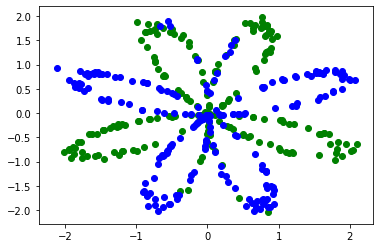

In [2]:
data = np.loadtxt('data.txt', delimiter=',')
X_train = data[:, :-1].T
y_train = data[:,-1].T
plotData(normalize(X_train), y_train, xlabel="1st exam", ylabel="2nd exam", plot_db=False, part_I = False)

# Plot the Decision Boundary #
After training, you can plot the decision boundary to see how well your model classify the training data

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.673146
Cost after iteration 200: 0.673146
Cost after iteration 300: 0.673146
Cost after iteration 400: 0.673146
Cost after iteration 500: 0.673146
Cost after iteration 600: 0.673146
Cost after iteration 700: 0.673146
Cost after iteration 800: 0.673146
Cost after iteration 900: 0.673146
train accuracy: 47.0 %
test accuracy: 47.0 %
w is  [[ 0.05526838]
 [-0.4070992 ]]
w_0 is  0.00036910680135728127


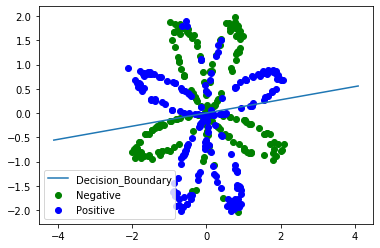

In [3]:
d = model(X_train, y_train, X_train, y_train, num_iterations = 1000, learning_rate = 0.01, print_cost = True)

plotData(normalize(X_train), y_train, xlabel="1st exam", ylabel="2nd exam", w = d["W"], b = d["w_0"], plot_db=False, part_I = True)